# Prediction using supervised Learning Task 1

Predict the percentage of an student based on the no. of study hours.
● This is a simple linear regression task as it involves just 2 variables.
● You can use R, Python, SAS Enterprise Miner or any other tool
● Data can be found at http://bit.ly/w-data
● What will be predicted score if a student studies for 9.25 hrs/ day?
● Sample Solution : https://bit.ly/2HxiGGJ
● Task submission:
1. Host the code on GitHub Repository (public). Record the code and
output in a video. Post the video on YouTube
2. Share links of code (GitHub) and video (YouTube) as a post on
YOUR LinkedIn profile, not TSF Network.
3. Submit the LinkedIn link in Task Submission Form when shared.

In [1]:
#All libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'stats'
from scipy import stats

#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]


G:\Python\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Reading data file
df=pd.read_csv('student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


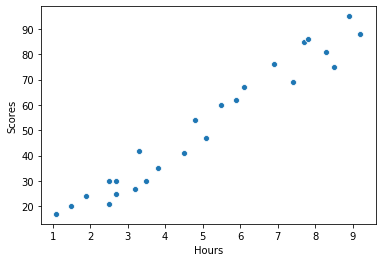

In [3]:
#ploting graph 
sns.scatterplot(data=df,x='Hours',y='Scores')
plt.show()

Here we can see there is positive correlation between hours and scores

In [4]:
# Correlation matrix
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


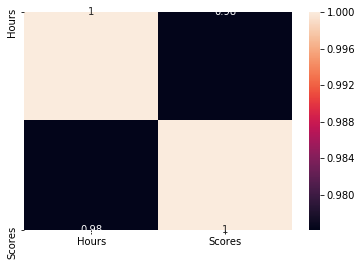

In [5]:
# Heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

In [17]:
import statsmodels.api as sm
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

#split data in train and test
# import train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


In [18]:
#Training the data - Linear regression 
# import function to perform linear regression
from sklearn.linear_model import LinearRegression    
lr = LinearRegression()    
lr.fit(X_train, y_train)   

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

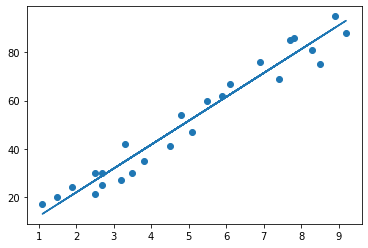

In [32]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_  
plt.scatter(X, y)  
plt.plot(X, line);  
plt.show()  

In [19]:

model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2111.
Date:                Wed, 20 Jan 2021   Prob (F-statistic):                    6.12e-21
Time:                        00:05:45   Log-Likelihood:                         -62.925
No. Observations:                  20   AIC:                                      127.8
Df Residuals:                      19   BIC:                                      128.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.2251      0.223     45.950      0.000       9.759      10.691
==============================================================================
Omnibus:                        2.581   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                1.529
Skew:                          -0.410   Prob(JB):                        0.466
Kurtosis:                       1.922   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#Predicting scores for the model is the next step

print(X_test)   
y_pred = lr.predict(X_test)  

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
#Comparing actual Vs predicted model 
data = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})    
data

,Actual,Predicted
14,17,16.884145
13,42,33.732261
17,24,75.357018
3,75,26.794801
21,54,60.491033


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [35]:
# You can also test with your own data
hrs =[ 9.25]
new_pred = lr.predict([hrs])
print("No of Hours = {}".format(hrs))
print("Predicted Score of student after studying for {} hours = {}".format(hrs,new_pred[0]))

No of Hours = [9.25]
Predicted Score of student after studying for [9.25] hours = 93.69173248737538


In [31]:
# Evaluting model
# 'metrics' from sklearn is used for evaluating the model performance
from sklearn import metrics 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
